In [48]:
# Initialize Otter
import otter
grader = otter.Notebook("lab09.ipynb")

# Lab 9: Probability and Modeling
In this lab, you will explore estimators and modeling in two parts:

1. You will explore if the "sample max" is a biased estimator for the true max of a population.

1. Given a sample (and no access to the population), you will bootstrap the sample correlation estimator to infer properties of the population correlation of two features.

**Due Date: Saturday, July 23, 11:59 PM PT.**

### Collaboration Policy
Data science is a collaborative activity. While you may talk with others about this assignment, we ask that you **write your solutions individually**. If you discuss the assignment with others, please **include their names** in the cell below.

**Collaborators:** *list names here*

In [49]:
# Run this cell to set up your notebook
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
from IPython.display import FileLink, FileLinks
FileLink('path_to_file/filename.extension')
%matplotlib inline
sns.set()
sns.set_context("talk")
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display, Latex, Markdown

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Part 1: Estimator for Population Max

Berkeley Half Marathon is an annual weekend-long race here in Berkeley. On race day, you want to know how many people participated in this year's race, but you don't have access to the official head count. So you want to find an estimator for this population maximum (Note: we artificially generated this data, but assume it is the population data as described). 

The bib numbers of each participant (i.e., racer) are in order of registration—integers from $1$ to the total unknown number of participants. You decide to construct a sample by recording the bib number of every racer you see on the street in a given time period, and use the maximum bib number in your sample as an estimator for the true maximum bib number (i.e., total number of particpants, assuming everyone who registered participated). Assume that a racer's bib number has no relation to their racing experience, so that you are equally likely to see any of bib number in your sample.

Is the sample maximum a good estimator for the population maximum? We'll use simulation to explore in this part of the lab.

**Note**: In Part 1 of this lab, **we assume that we have access to the true population of racers** (and therefore the parameter, the true population maximum), so that we can evaluate the sample maximum across all possible samples. **However, in practice we don't have access to the population, nor the population parameter**. In Part 2, we'll explore the analysis we can do if just provided a single sample.

---

## Question 1

Let's first assume that we have access to the total number of participants (in practice we don't!). The dataset `marathon.csv` includes information for all racers who registered for the Berkeley Half Marathon.

Load the dataset `marathon.csv` into the DataFrame `marathon`, assign `true_max` to the true maximum bib number of the population. (Recall that max bib number is our proxy for total number of participants.)

<!--
BEGIN QUESTION
name: q1
-->

In [50]:
marathon = pd.read_csv("marathon.csv")
true_max = max(marathon["Bib Number"])
true_max

50732

In [51]:
grader.check("q1")

q1 results: All test cases passed!

In [52]:
marathon.head()

,Bib Number,Race Type
0,1,10K
1,2,5K
2,3,1K
3,4,10K
4,5,10K


In [53]:
# just run this cell
marathon.describe()

,Bib Number
count,50732.000000
mean,25366.500000
std,14645.211265
min,1.000000
25%,12683.750000
50%,25366.500000
75%,38049.250000
max,50732.000000


---

## Question 2

How would a sample maximum compare to the true maximum? Formally defined, let $X_1, \dots, X_n$ be a sample of $n$ random variables drawn IID (independent and identically distributed) from the population. Define the **sample max** as the maximum value of the sample.

$$\text{samplemax} = \max (X_1, \dots, X_n)$$


Recall from [Data 8](https://inferentialthinking.com/chapters/10/3/Empirical_Distribution_of_a_Statistic.html) that we can get the empirical distribution of a statistic by **simulating**, or repeatedly sampling from the population.
Suppose we compute the sample max as the maximum bib number from observing the bib numbers of $n = 200$ random racers. By repeating this process for many randomly selected samples, we get a simulated distributed of the sample max statistic.

Assign `sample_maxes` to an array that contains 5,000 simulated sample maxes from samples of size 200, each sampled randomly **with replacement** from the population `marathon`. (Side note: We sample with replacement because while it suggests that we could see the same racer multiple times in our sample, it allows us to assume each individual in our sample is drawn IID from the population.)

Some useful functions: `df.sample` ([link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)), `np.random.choice` ([link](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)). Do not edit the `np.random.seed` call, which sets the pseudorandomness of the autograder. 


<!--
BEGIN QUESTION
name: q2
-->

In [57]:
np.random.seed(2022) # do not change this line

sample_maxes = np.array([])
for i in range(5000):
    sample_ = marathon.sample(n=200,replace = True)["Bib Number"]
    sample_maxes = np.append(sample_maxes,max(sample_))


In [58]:
grader.check("q2")

q2 results: All test cases passed!

---
## Question 3

### Question 3a

Plot the empirical distribution of the sample maximum that you generated in Question 2. Your plot should look like the below plot. It should include both the average sample maximum and the true population maximum as vertical lines.

<img src='images/sample_max_dist.png' width="600px" />

Visualization/plotting tips:
* To plot a vertical line with specific linestyles, see the `plt.axvline` [documentation](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.axvline.html).
* To include a label in the legend, pass in `label=...` to the plot that you'd like to label ([example](https://matplotlib.org/3.5.1/gallery/pyplots/axline.html#sphx-glr-gallery-pyplots-axline-py)).

<!--
    BEGIN QUESTION
    name: q3a
-->

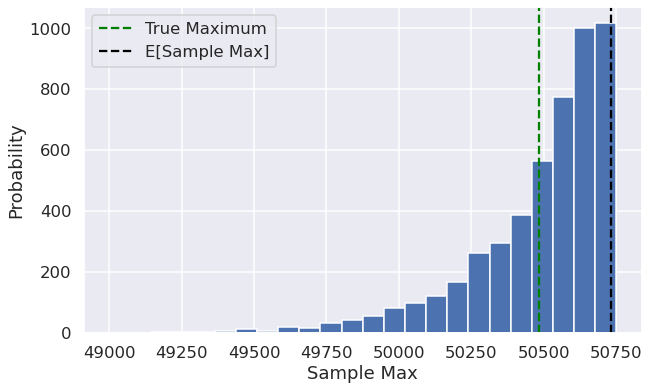

In [59]:
plt.figure(figsize = [10, 6])
bins = np.linspace(49000, 50750, 25) # for your plot

avg_sample_maxes = plt.axvline(np.mean(sample_maxes), c = "green", label = "True Maximum",linestyle = '--')
truemax = plt.axvline(true_max, c = "black", label = "E[Sample Max]",linestyle = '--')
plt.hist(sample_maxes,bins)
plt.xlabel("Sample Max")
plt.ylabel("Probability")
plt.legend();     # show legend

---

### Question 3b

Recall from Spring 2022 Lecture 17 that an **unbiased estimator** is one where the expected value of the estimator is the parameter. For example, the sample mean $\bar{X}_n$ is an unbiased estimator of the population mean $\mu$ because $\mathbb{E}[\bar{X}_n] = \mu$ by the Central Limit Theorem.

Based on your analysis in Question 3a, assign `q3b` to the most correct option; then in the second cell, **explain your choice.**

1. The sample maximum is an unbiased estimator of the population maximum.
1. The sample maximum overestimates the population maximum.
1. The sample maximum underestimates the population maximum.

<!--
BEGIN QUESTION
name: q3b
-->

In [60]:
q3b = 3

In [61]:
grader.check("q3b")

q3b results: All test cases passed!

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Part 2: Inference for the Population Correlation

The previous part assumed that we had access to the population; from there, we simulated many different samples to understand properties of our estimator. In practice, however, we only have access to one sample (and therefore one value of our estimator); we will explore this next.


In Spring 2022 Lecture 16, we defined **population correlation** as the expected product of *standardized* deviations from expectation: 

$$r(X, Y) =  \mathbb{E} \left[\left(\frac{X - \mathbb{E}[X]}{\text{SD}(X)} \right) \left(\frac{Y - \mathbb{E}[Y]}{\text{SD}(Y)}\right)\right]$$

Note that population correlation involves the population means $\mathbb{E}[X]$ and $\mathbb{E}[Y]$ and the population standard deviations $\text{SD}(X)$ and $\text{SD}(Y)$. Correlation provides us with important information about the linear relationship between variables. In this part, we'll explore the `tips` dataset once more, and we will compute the sample correlation statistic of two features: total bill and party size. We will then explore how the sample correlation estimates the true population correlation parameter.

The below cell assigns `data` to our single sample collected about customer tipping behaviors.

In [62]:
# just run this cell
tips = sns.load_dataset("tips")
data = tips[['total_bill','size']]
data

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4
...,...,...
239,29.03,3
240,27.18,2
241,22.67,2
242,17.82,2


---

## Question 4
To estimate the population correlation, we'd like to use an estimator based on data from a simple random sample of our tips data set. For a sample $(X_1, Y_1), \dots, (X_n, Y_n)$ generated IID from a population,  define the **sample correlation** as follows:

$$\frac{\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)\left(Y_i-\overline{Y}\right)}{\sqrt{\sum\limits_{i=1}^n \left(X_i - \overline{X}\right)^2}\sqrt{\sum\limits_{i=1}^n \left(Y_i - \overline{Y}\right)^2}}$$



Note the similar structure to the true population correlation. If the $i$-th individual in our sample has "total bill" $X_i$ and "party size" $Y_i$, then $\overline{X}, \overline{Y}$ are the sample means of total bill and party size, respectively.

Implement the `sample_correlation` function in the cell below to compute the sample correlation for `sample`, which has two columns: `total_bill` and `size`.

<!--
BEGIN QUESTION
name: q4
-->

In [84]:
def sample_correlation(sample):
    """Compute sample correlation of x and y.
    sample: A DataFrame of dimension (n, 2)
    """
    x, y = sample['total_bill'], sample['size']
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    n = len(sample)
    numerator = np.dot((x-x_bar),(y-y_bar))
    denominator = np.dot(np.sqrt(np.sum((x-x_bar)**2)),np.sqrt(np.sum((y-y_bar)**2)))
    return numerator/denominator

sample_correlation(data)

0.5983151309049014

In [85]:
grader.check("q4")

q4 results: All test cases passed!

Let the sample correlation of `data` be the estimator for the population correlation. In other words:

* **Parameter**: Population correlation. Unknown, but fixed.
* **Statistic**: Sample correlation. Dependent on the random sample we obtained.
* **Estimator**: The sample correlation statistic `corr_est` is an estimator of the population correlation parameter.

In [76]:
# just run this cell
corr_est = sample_correlation(data)
corr_est

0.5983151309049014

What can we infer about the population correlation given this estimate? Is it possible that the total bill and the party size are actually uncorrelated?

We can perform bootstrapped hypothesis testing as follows:

**Null hypothesis**: Total bill and party size are uncorrelated; the population correlation is 0.

**Alternate hypothesis**: The population correlation is not 0.

To test this hypothesis, we can bootstrap a $(1-p)$% confidence interval for the population correlation and check if 0 is in the interval. If 0 is in the interval, the data are consistent with the null hypothesis. If 0 is *not* in the interval, we reject the null hypothesis at the $p$% significance level. For more on the duality of the confidence interval and the p-value, see this [StackExchange discussion](https://stats.stackexchange.com/questions/179902/confidence-interval-p-value-duality-vs-frequentist-interpretation-of-cis). 

---

## Question 5

Implement the `ci_correlation` function in the cell below that returns a bootstrapped confidence interval at the $conf$% level. Your bootstrap should resample the `sample` dataframe with replacement `m` times to construct `m` bootstrapped sample correlations using the `sample_correlation` function you implemented in Question 4.

Then, assign `boot_ci` to the bootstrapped 95\% confidence interval for the tips `data` sample.


<!--
BEGIN QUESTION
name: q5
-->

In [86]:
def ci_correlation(sample, conf, m=5000):
    """Compute a confidence interval for an estimator.
    sample: A DataFrame or Series
    estimator: A function that maps a sample DataFrame to an estimate (number)
    """
    estimates = []
    n = len(sample)
    for j in range(m):
        resample = sample.sample(n,replace = True)
        estimate = sample_correlation(resample)
        estimates = np.append(estimates,estimate)
    lower = np.percentile(estimates,(100-conf)/2)
    upper = np.percentile(estimates,100-(100-conf)/2)
    return (lower, upper)

boot_ci = ci_correlation(data, 95, m=5000)
boot_ci

(0.5149406019251996, 0.6793881732094066)

In [87]:
grader.check("q5")

q5 results: All test cases passed!

---

## Question 6
Now that we have the bootstrapped 95% confidence interval of the parameter based on a single sample of size 244, let's determine what we can conclude about our population correlation.

### Question 6a
Fill in the blanks for the sentence:

By bootstrapping our sample `data`, our estimate of the population correlation is ________ with a ___ % confidence interval of ________.


<!--
BEGIN QUESTION
name: q6a
-->

_By bootstapping our sample data, our estimate of the population correlation between wih a 95% confidence interval of data._

---

### Question 6b

In the cell below, interpret the statement in Question 6a. Can we reject the null hypothesis at the 5% significance level? What can we infer about the relationship between total bill and party size?

<!--
BEGIN QUESTION
name: q6b
-->

_We could reject the null hypothesis and conclude that the population correlation ._

## Submission

Congratulations! You are finished with this assignment. Please don't forget to submit by 11:59 PM on July 23, 2022!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)